Values can be in the range $0$ to $2^{32}-1$

If you then divide by $2^{32}$ you get values in the range $[0,1]$.

In [47]:
x = 1987 #seed 
a = 69069
c = 1
m = 2^32
nextX = (a*x + c) % m
nextX2 = (a*nextX + c) % m
tup = x, nextX, nextX2
tup, tup./m

((1987, 137240104, 43920905), (4.6263448894023895e-7, 0.03195370174944401, 0.01022613258101046))

In [40]:
zeros(Float64,10)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Our try at a random number generator

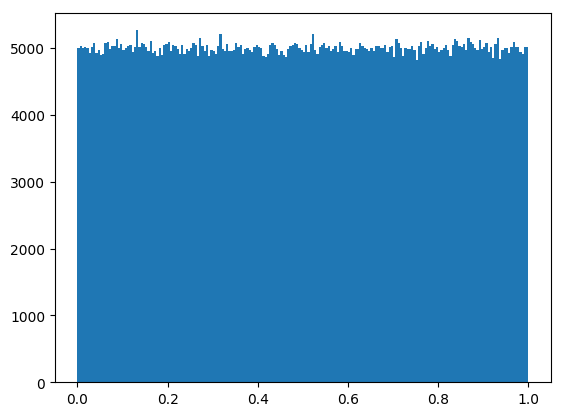

In [72]:
using Statistics,PyPlot

function myRand(seed,n)
   a, c, m = 69069, 1, 2^32
   x = seed
   arr = zeros(Float64,n)
   for i in 1:n
        x = (a*x + c) % m
        # put the random value in the array...
        arr[i] = x/m
   end
   return arr 
end

data = myRand(2001,10^6)
sum(data)/length(data) #arithmetic mean
mean(data),var(data),1/12 #theor variance
minimum(data),maximum(data)
numBins = 200
plt[:hist](data,numBins);

The variance of a dataset is $\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$

The variance of a uniform $[0,1]$ random variable.... $\int_0^1(x-\frac{1}{2})^2 \, dx = \frac{1}{12}$

The Central Limit Theorem:  Given a sequence of (i.i.d.) random variables $X_1,X_2,\ldots$. Take $S_n = \sum_{i=1}^n X_i$. Then $\frac{S_n - E[S_n]}{\sqrt{Var(S_n)}}$ approaches a standard normal distribution.

$f(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}$

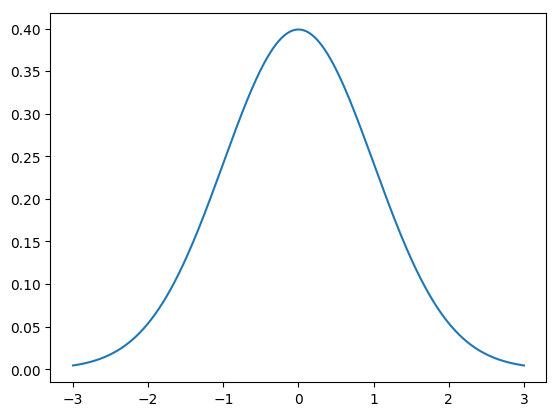

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcb874e6e50>

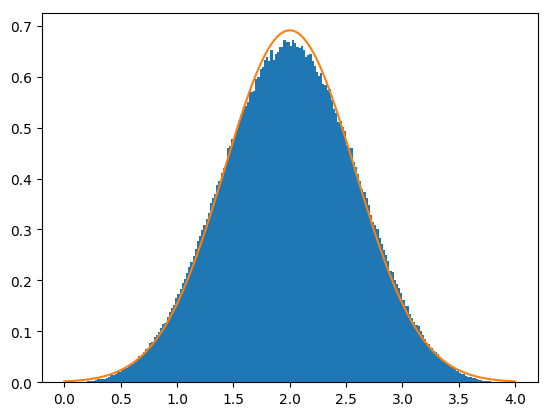

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcb85fab810>

In [93]:
seed1, seed2, seed3, seed4 = 1957, 2008, 6454, 3423
n = 10^6
numBins = 200
data1 = myRand(seed1,n)
data2 = myRand(seed2,n)
data3 = myRand(seed3,n)
data4 = myRand(seed4,n)
plt[:hist]( data1 + data2 + data3 + data4,numBins,normed=true);

f(x) = (1/sqrt(2pi))*exp(-x^2/2)
g(x,mu,sig) = f((x-mu)/sig)*(1/sig)
xGrid = 0:0.01:4.0
yVals = [g(x,2,sqrt(4/12)) for x in xGrid]
plot(xGrid,yVals)


In [56]:
? mean

search: mean mean! median median! PKGMODE_MANIFEST SegmentationFault macroexpand



```
mean(itr)
```

Compute the mean of all elements in a collection.

!!! note
    If `itr` contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the mean of non-missing values.


# Examples

```jldoctest
julia> mean(1:20)
10.5

julia> mean([1, missing, 3])
missing

julia> mean(skipmissing([1, missing, 3]))
2.0
```

---

```
mean(f::Function, itr)
```

Apply the function `f` to each element of collection `itr` and take the mean.

```jldoctest
julia> mean(√, [1, 2, 3])
1.3820881233139908

julia> mean([√1, √2, √3])
1.3820881233139908
```

---

```
mean(A::AbstractArray; dims)
```

Compute the mean of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> mean(A, dims=1)
1×2 Array{Float64,2}:
 2.0  3.0

julia> mean(A, dims=2)
2×1 Array{Float64,2}:
 1.5
 3.5
```


In [35]:
using Random
Random.seed!(200113)
rand(),rand(),rand()

(0.31106965697333, 0.5688009013440853, 0.17119799533255797)

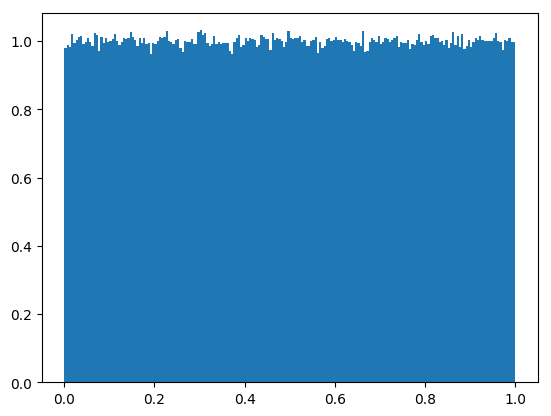

In [52]:
using PyPlot, Statistics
n = 1
plt[:hist]([mean(rand(n)) for _ in 1:10^6],200,normed=true);